In [1]:
import os
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

original_cwd = os.getcwd()
os.chdir("../scripts")
from population import within_radius_mask
from file_management import tif_data
os.chdir(original_cwd)

In [2]:
abc = 'abcdefgh'
countries = ['DE', 'DK', 'NL', 'BE', 'DE', 'PL', 'CZ', 'AT', 'CH']

# Input

In [3]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [4]:
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", index_col=0)[
        ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
    ]
    tmp.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
    tmp['disamenity'] = tmp['disamenity']
    tmp[c] = 2
    turbines = turbines.append(tmp)
    
turbines.sum()

engineering    4.735873e+07
disamenity     2.861334e+06
1              3.154750e+08
2              1.229476e+09
3              2.329770e+09
4              3.423693e+09
DE             9.612920e+05
DK             8.504000e+03
NL             1.060200e+05
BE             4.238000e+04
PL             7.994240e+05
CZ             2.362520e+05
AT             1.465560e+05
CH             4.150400e+04
dtype: float64

# Section 2

In [5]:
weights3 = within_radius_mask(3)

C:\Users\olive\AppData\Local\Temp/ipykernel_14152/4066745719.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(-4,4))
C:\Users\olive\AppData\Local\Temp/ipykernel_14152/4066745719.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(-4,4))


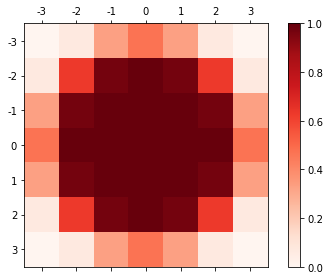

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap=plt.get_cmap('Reds')
cax = ax.matshow(weights3.astype(float), cmap = cmap)
fig.colorbar(cax)
ax.set_xticklabels(range(-4,4))
ax.set_yticklabels(range(-4,4))

plt.tight_layout()
plt.savefig('Figure 2.png', dpi=300)

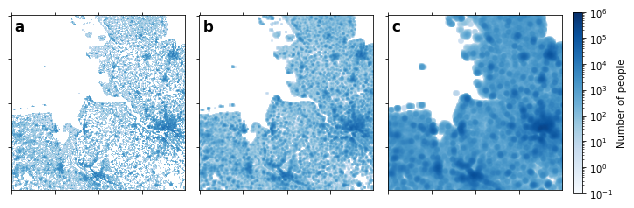

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()
plt.savefig('Figure 3.png', dpi=300)

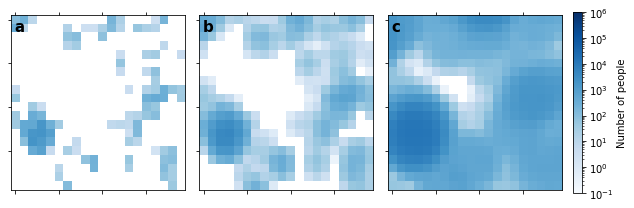

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[2080:2100, 3380:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()

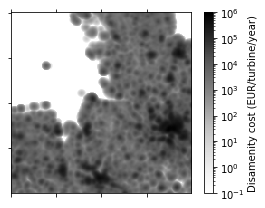

In [55]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
cmap=plt.get_cmap('Greys')
cax = ax.matshow(
    tif_data('../build/disamenity-cost.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
    cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1000000)
)
ax.set_xticklabels([])
ax.set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Disamenity cost (EUR/turbine/year)')

plt.tight_layout()
plt.savefig('Figure 4.png', dpi=300)

# Subsection 3.1

In [5]:
targets = {
    'DE': 210
}

Cost potential curves

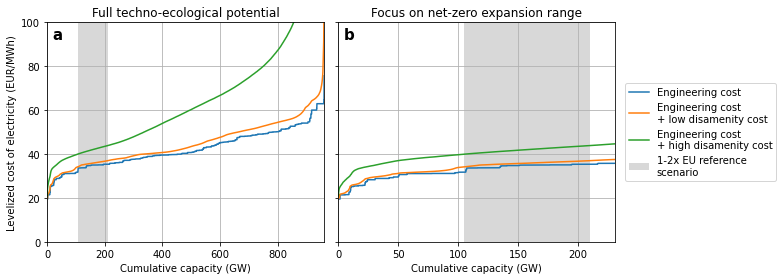

In [37]:
c = 'DE'

fig = plt.figure(figsize=[11,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()
total_cost_low = (tmp['engineering'] + tmp['disamenity']).sort_values()
total_cost_high = (tmp['engineering'] + 10 * tmp['disamenity']).sort_values()

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.fill_between([0.5*targets[c], targets[c]], [0,0], [100,100], facecolor='grey', alpha=0.3)

plt.plot(cumulative_capacity, engineering_cost)
plt.plot(cumulative_capacity, total_cost_low)
plt.plot(cumulative_capacity, total_cost_high)

#plt.axvline(targets[c], color='black', linestyle='--')
#plt.text(1.15 * targets[c], 5, '1-2x EU\nreference\nscenario', 
#         bbox={'facecolor': 'white', 'edgecolor': 'grey'})

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, cumulative_capacity.iloc[-1])
plt.ylim(0, 100)
plt.grid()
plt.title('Full techno-ecological potential')

ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

plt.fill_between([0.5*targets[c], targets[c]], [0,0], [100,100], facecolor='grey', alpha=0.3, label='1-2x EU reference\nscenario')
#plt.text(0.75 * targets[c], 5, '1-2x EU\nreference\nscenario', 
#         bbox={'facecolor': 'white', 'edgecolor': 'grey'})

plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')
plt.plot(cumulative_capacity, total_cost_low, label='Engineering cost\n+ low disamenity cost')
plt.plot(cumulative_capacity, total_cost_high, label='Engineering cost\n+ high disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 1.1*targets[c])
plt.xticks(range(0, 210, 50))
plt.ylim(0, 100)
plt.grid()
plt.title('Focus on net-zero expansion range')

plt.legend(loc='center right', bbox_to_anchor=(1.6,0.5))
plt.tight_layout()
plt.savefig('Figure 5.png', dpi=300)

In [32]:
tmp['disamenity'].mean() / tmp['engineering'].mean()

0.062417767369490125

In [39]:
tmp =  pd.DataFrame({
    'full': {
        'engineering': engineering_cost.mean().round(),
        'total low': total_cost_low.mean().round(),
        'total high': total_cost_high.mean().round(),
    },
    '1x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000/2)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000/2)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000/2)].round(),
    },
    '2x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000)].round(),
    },
    '2x EU reference scenario (mean)': {
        'engineering': engineering_cost.iloc[:int(targets[c]/2*1000)].mean().round(1),
        'total low': total_cost_low.iloc[:int(targets[c]/2*1000)].mean().round(),
        'total high': total_cost_high.iloc[:int(targets[c]/2*1000)].mean().round(),
    }
})
tmp / tmp.loc['engineering']

,full,1x EU reference scenario (marginal),2x EU reference scenario (marginal),2x EU reference scenario (mean)
engineering,1.000000,1.000000,1.000000,1.000000
total low,1.071429,1.072555,1.048159,1.037736
total high,1.642857,1.261830,1.246459,1.226415


1x EU Ref.: Engineering cost increase from 28.917615792602952 to 31.120296053261132 by 1.0761708806305401
2x EU Ref.: Engineering cost increase from 31.76336775743181 to 33.75721173275926 by 1.062771806521081


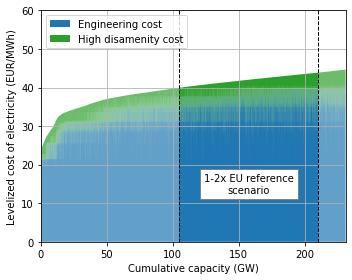

In [84]:
c = 'DE'

fig = plt.figure(figsize=[5,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = cumulative_capacity = tmp[c].cumsum() / 1000

ax = fig.add_subplot(111)

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
n = int(1.1*targets[c]/2*1000)
plt.fill_between(cumulative_capacity[:n], 0, engineering_cost[:n], label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity[:n], engineering_cost[:n], disamenity_cost[:n], label='High disamenity cost', facecolor='tab:green')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 1.1 * targets[c])
plt.ylim(0, 60)
plt.grid()
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Figure 6.png', dpi=300)

a = tmp.sort_values('engineering')['engineering'].iloc[:int(0.5*targets[c]/2*1000)].mean()
b = tmp.sort_values('total')['engineering'].iloc[:int(0.5*targets[c]/2*1000)].mean()
print(f'1x EU Ref.: Engineering cost increase from {a} to {b} by {b/a}')

a = tmp.sort_values('engineering')['engineering'].iloc[:int(1*targets[c]/2*1000)].mean()
b = tmp.sort_values('total')['engineering'].iloc[:int(1*targets[c]/2*1000)].mean()
print(f'2x EU Ref.: Engineering cost increase from {a} to {b} by {b/a}')

In [83]:
def highlight(y=5):
    plt.axvline(0.5*targets[c], color='k', linestyle='--', linewidth=1)
    plt.axvline(targets[c], color='k', linestyle='--', linewidth=1)
    plt.fill_between([0, 0.5*targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.fill_between([targets[c], 1.1*targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.text(0.75 * targets[c], y, '1-2x EU reference\nscenario', ha='center', va='center',
             bbox={'facecolor': 'white', 'edgecolor': 'grey'})

Exposure between 3.3 and 6.9
Exposure between 2.5 and 4.7
Reduction to 0.76 and 0.68
Exposure between 1.3 and 2.5
Reduction to 0.39 and 0.36


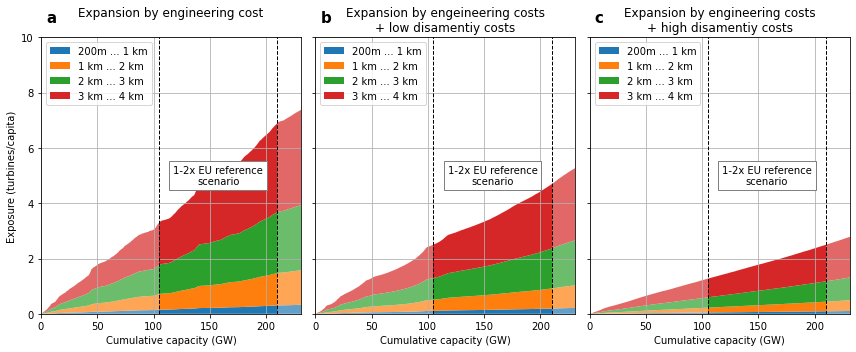

In [89]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines[turbines['DE']>0].copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Exposure (turbines/capita)')
plt.xlim(0, 1.1*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()

a0 = bottom[int(0.5*targets[c]/2*1000)]
b0 = bottom[int(1*targets[c]/2*1000)]
print(f'Exposure between {round(a0, 1)} and {round(b0, 1)}')


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total1'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total1').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 1.1*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engeineering costs\n+ low disamentiy costs')
plt.grid()

a1 = bottom[int(0.5*targets[c]/2*1000)]
b1 = bottom[int(1*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total2'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total2').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 1.1*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

a1 = bottom[int(0.5*targets[c]/2*1000)]
b1 = bottom[int(1*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


plt.tight_layout()
plt.savefig('Figure 7.png', dpi=300)

In [43]:
tmp_eng = tmp.sort_values('engineering').iloc[:n].copy()
interactions = tmp_eng.sum()[range(1,5)].sum()
interactions / 1_000_000

604.4750408100001

In [44]:
interactions / 80_000_000

7.555938010125001

In [45]:
interactions / len(tmp_eng)

5348.24806287216

In [50]:
interactions / len(tmp_eng) /3

1782.7493542907198

In [42]:
tmp_eng.mean()[range(1,5)].sum()

5348.24806287216

In [49]:
tmp_eng

,engineering,disamenity,1,2,3,4,DE,total1,total2
1980,18.351283,0.465646,395.34,461.32,59.25,0.09,2,18.816929,23.007742
19279,19.361049,0.626735,410.99,771.71,61.29,1.95,2,19.987783,25.628396
19328,19.361049,0.416727,80.88,657.82,491.73,15.57,2,19.777776,23.528322
19538,19.361049,0.508996,255.17,624.23,363.12,3.48,2,19.870044,24.451004
19382,19.361049,0.626735,410.99,771.71,61.29,1.95,2,19.987783,25.628396
...,...,...,...,...,...,...,...,...,...
47568,35.356817,0.366990,50.60,159.40,318.03,724.23,2,35.723807,39.026719
43009,35.356817,0.892334,306.65,326.83,379.67,1044.51,2,36.249151,44.280160
45457,35.356817,0.488405,67.74,378.34,228.37,423.24,2,35.845221,40.240863
47693,35.356817,0.316797,84.63,147.57,171.09,347.24,2,35.673614,38.524784


# Smart vs. dumb distancing

In [62]:
tmp[tmp[1]==0]

,engineering,disamenity,1,2,3,4,DK,NL,BE,DE,PL,CZ,AT,CH
2568,27.730432,0.137453,0.0,7.24,86.13,1571.87,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2656,27.730432,0.479940,0.0,17.80,1025.54,2963.08,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2657,27.730432,0.479940,0.0,17.80,1025.54,2963.08,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2740,27.730432,0.479940,0.0,17.80,1025.54,2963.08,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2847,27.730432,0.479940,0.0,17.80,1025.54,2963.08,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565042,69.850092,0.011154,0.0,4.22,7.30,5.05,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
565055,69.850092,0.146294,0.0,4.04,89.34,468.40,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
565057,69.850092,0.040134,0.0,4.14,19.75,123.03,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
565064,69.850092,0.040134,0.0,4.14,19.75,123.03,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

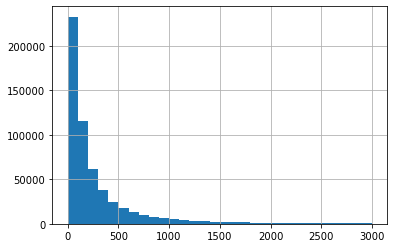

In [69]:
tmp[1].hist(bins=[0]+list(range(0,3001,100)))

In [75]:
sum(tmp[1]<1)

18598

In [74]:
sum(tmp[1]>=1)

546521

In [79]:
turbines_DE_1000m = pd.read_csv(f"../build/turbines-DE-1000m.csv", index_col=0)[
    ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
]
turbines_DE_1000m.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
#turbines_DE_1000m['disamenity'] = tmp['disamenity'] / 8
turbines_DE_1000m['DE'] = 2
turbines_DE_1000m

,engineering,disamenity,1,2,3,4,DE
0,27.220797,2.709257,114.99,1474.81,5882.48,5338.14,2
1,27.220797,4.768860,694.96,4534.02,6601.98,1541.15,2
2,27.220797,5.076072,1043.41,4892.85,5759.34,1415.78,2
3,27.220797,0.147404,33.95,105.61,193.46,166.42,2
4,27.220797,0.260475,70.76,213.38,159.07,596.52,2
...,...,...,...,...,...,...,...
360513,69.850092,2.049957,5.88,119.44,1571.78,4877.72,2
360514,69.850092,2.985657,52.05,327.31,2681.18,3966.72,2
360515,69.850092,1.402584,77.87,390.99,802.51,989.93,2
360516,69.850092,1.402584,77.87,390.99,802.51,989.93,2


32.94339774202837


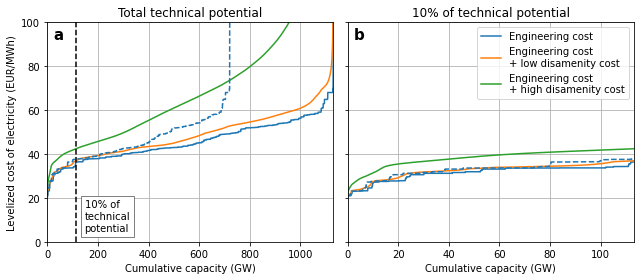

In [88]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()
total_cost_low = (tmp['engineering'] + tmp['disamenity']).sort_values()
total_cost_high = (tmp['engineering'] + 10 * tmp['disamenity']).sort_values()

cumulative_capacity_dumb = turbines_DE_1000m[c].cumsum() / 1000
engineering_cost_dumb = turbines_DE_1000m['engineering'].sort_values()
total_cost_low_dumb = (turbines_DE_1000m['engineering'] + turbines_DE_1000m['disamenity']).sort_values()
total_cost_high_dumb = (turbines_DE_1000m['engineering'] + 10 * turbines_DE_1000m['disamenity']).sort_values()

print(engineering_cost_dumb.iloc[:n].mean())

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.plot(cumulative_capacity, engineering_cost)
plt.plot(cumulative_capacity, total_cost_low)
plt.plot(cumulative_capacity, total_cost_high)

plt.plot(cumulative_capacity_dumb, engineering_cost_dumb, linestyle='--', color='tab:blue')
#plt.plot(cumulative_capacity_dumb, total_cost_low_dumb, linestyle='--', color='tab:orange')
#plt.plot(cumulative_capacity_dumb, total_cost_high_dumb, linestyle='--', color='tab:green')

plt.axvline(0.1 * cumulative_capacity.iloc[-1], color='black', linestyle='--')
plt.text(0.13 * cumulative_capacity.iloc[-1], 5, '10% of\ntechnical\npotential', 
         bbox={'facecolor': 'white', 'edgecolor': 'grey'})

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, cumulative_capacity.iloc[-1])
plt.ylim(0, 100)
plt.grid()
plt.title('Total technical potential')

ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')
plt.plot(cumulative_capacity, total_cost_low, label='Engineering cost\n+ low disamenity cost')
plt.plot(cumulative_capacity, total_cost_high, label='Engineering cost\n+ high disamenity cost')

plt.plot(cumulative_capacity_dumb, engineering_cost_dumb, linestyle='--', color='tab:blue')
#plt.plot(cumulative_capacity_dumb, total_cost_low_dumb, linestyle='--', color='tab:orange')
#plt.plot(cumulative_capacity_dumb, total_cost_high_dumb, linestyle='--', color='tab:green')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 100)
plt.grid()
plt.title('10% of technical potential')

plt.legend()
plt.tight_layout()
plt.savefig('Figure 6.png', dpi=300)

33.90384146179285
42.5478349396732


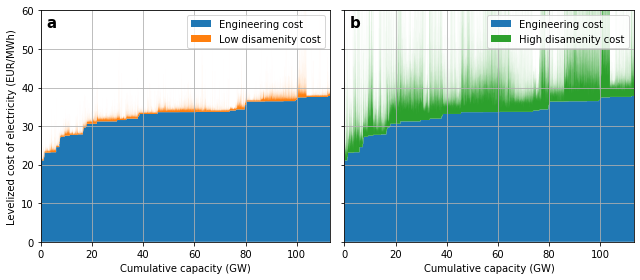

In [97]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines_DE_1000m.copy()
cumulative_capacity = cumulative_capacity = tmp[c].cumsum() / 1000

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp['total'] = tmp['engineering'] + tmp['disamenity']
engineering_cost = tmp.sort_values('engineering')['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = tmp.sort_values('engineering')['total']
print(disamenity_cost.iloc[:n].mean())
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Low disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 2*n/1000)
plt.ylim(0, 60)
plt.grid()
plt.legend()


ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values('engineering')['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = tmp.sort_values('engineering')['total']
print(disamenity_cost.iloc[:n].mean())
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, facecolor='tab:green', label='High disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2*n/1000)
plt.ylim(0, 60)
plt.grid()
plt.legend()

plt.tight_layout()

In [17]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines_DE_1000m.copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Affected people (k)')
plt.xlim(0, 2*n/1000)
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2*n/1000)
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engeineering costs\n+ low disamentiy costs')
plt.grid()


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2*n/1000)
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

plt.tight_layout()

NameError: name 'turbines_DE_1000m' is not defined

# Cross country

In [136]:
results = pd.DataFrame()

for c in countries:
    
    tmp = turbines[turbines[c]>0].copy()
    tmp['total cost low'] = tmp['engineering'] + tmp['disamenity']
    tmp['total cost high'] = tmp['engineering'] + 10 * tmp['disamenity']
    results_c = pd.Series({
        'Technical potential (GW)': (tmp[c].sum() / 1000).round()
    })
    
    # Expansion target
    share = 0.25
    n = int(share * len(tmp))
    results_c['Expansion target (GW)'] = share * results_c['Technical potential (GW)']
    
    # Average cost
    results_c['Average engineering cost (€/MWh)'] = tmp['engineering'].sort_values().iloc[:n].mean().round()
    results_c['Average total cost low (€/MWh)'] = tmp['total cost low'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost low (%)'] = 100 * (results_c['Average total cost low (€/MWh)'] / results_c['Average engineering cost (€/MWh)'] - 1).round(2)
    results_c['Average total cost high (€/MWh)'] = tmp['total cost high'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost high (%)'] = 100 * (results_c['Average total cost high (€/MWh)'] / results_c['Average engineering cost (€/MWh)'] - 1).round(2)
    
    # Exposure
    results_c['Exposure - expansion by engineering cost (capita/turbine)'] = (tmp.fillna(0).sort_values('engineering').iloc[:n][list(range(1, 5))].sum().sum() / n).round()
    results_c['Exposure - expansion by total cost high (capita/turbine)'] = (tmp.fillna(0).sort_values('total cost high').iloc[:n][list(range(1, 5))].sum().sum() / n).round()
    for i in range(1,5):
        results_c[f'{i}'] = (tmp.fillna(0).sort_values('total cost high').iloc[:n][i].sum() / n).round()
    
    results[c] = results_c

results = results.sort_values('Average engineering cost (€/MWh)', axis=1)
results

,DK,NL,BE,FR,AT,DE,CZ,PL,CH
Technical potential (GW),9.00,106.0,42.0,1705.00,147.00,961.00,236.0,799.00,42.0
Expansion target (GW),2.25,26.5,10.5,426.25,36.75,240.25,59.0,199.75,10.5
Average engineering cost (€/MWh),20.00,27.0,29.0,29.00,30.00,32.00,33.0,34.00,48.0
Average total cost low (€/MWh),20.00,29.0,32.0,30.00,31.00,34.00,34.0,35.00,52.0
Increase in average cost low (%),0.00,7.0,10.0,3.00,3.00,6.00,3.0,3.00,8.0
Average total cost high (€/MWh),22.00,38.0,43.0,35.00,37.00,40.00,39.0,40.00,73.0
Increase in average cost high (%),10.00,41.0,48.0,21.00,23.00,25.00,18.0,18.00,52.0
Exposure - expansion by engineering cost (capita/turbine),2217.00,12854.0,13734.0,4932.00,4505.00,5178.00,5316.0,4147.00,8250.0
Exposure - expansion by total cost high (capita/turbine),1321.00,3829.0,4063.0,1703.00,2122.00,1965.00,1681.0,1473.00,4664.0
1,61.00,116.0,153.0,69.00,78.00,74.00,60.0,61.00,166.0


(0.0, 80.0)

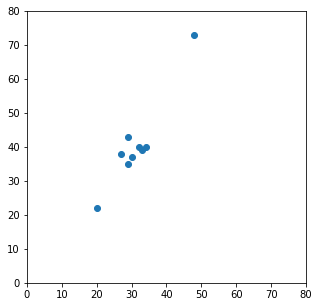

In [116]:
plt.figure(figsize=(5,5))
plt.scatter(results.loc['Average engineering cost (€/MWh)'], results.loc['Average total cost high (€/MWh)'])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Engineering cost (€/MWh)')
plt.xlabel('Engineering cost (€/MWh)')

In [152]:
pd.Series([3, np.nan]).mean()

3.0

In [149]:
import numpy as np

In [ ]:
pan

<Figure size 360x360 with 0 Axes>

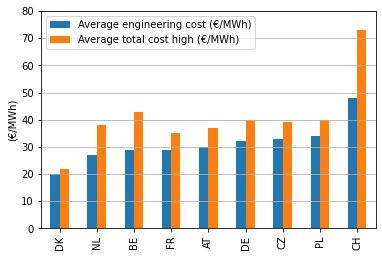

In [143]:
plt.figure(figsize=(5,5))
results.loc[['Average engineering cost (€/MWh)', 'Average total cost high (€/MWh)']].transpose().plot(kind='bar')
#plt.xlim(0, 80)
plt.ylim(0, 80)
plt.ylabel('(€/MWh)')
plt.grid(axis='y')

<Figure size 360x360 with 0 Axes>

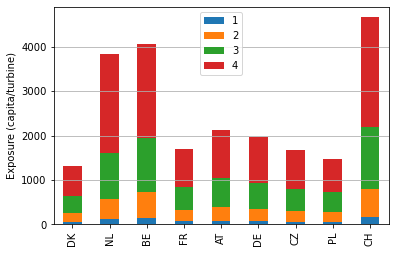

In [144]:
plt.figure(figsize=(5,5))
results.loc[[str(i) for i in range(1,5)]].transpose().plot(kind='bar', stacked=True)
#plt.xlim(0, 80)
#plt.ylim(0, 80)
plt.ylabel('Exposure (capita/turbine)')
plt.grid(axis='y')

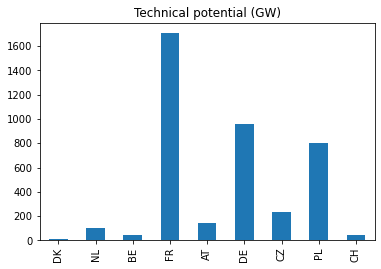

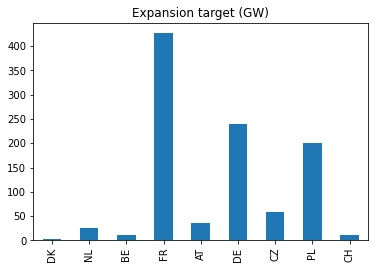

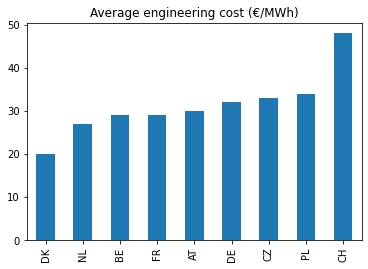

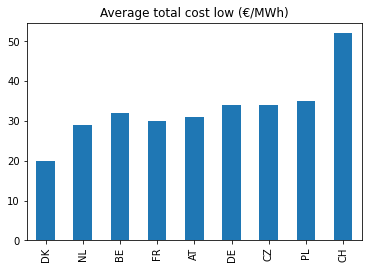

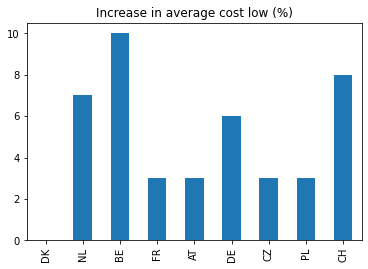

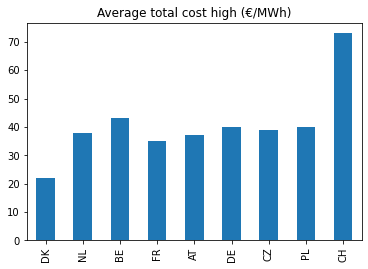

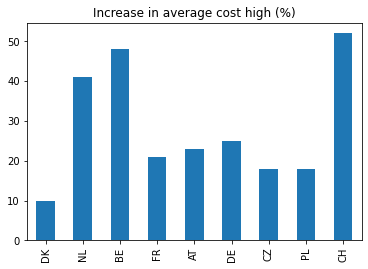

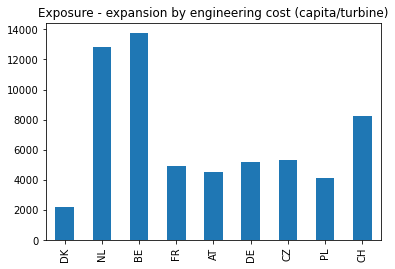

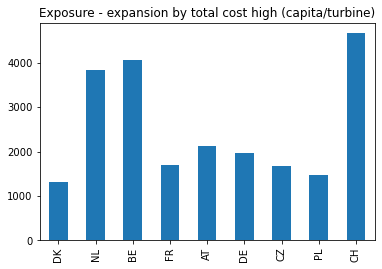

In [131]:
for param in results.index:
    plt.figure()
    results.loc[param].plot(kind='bar', title=param)
    plt.grid
    #plt.ylim(0,80)

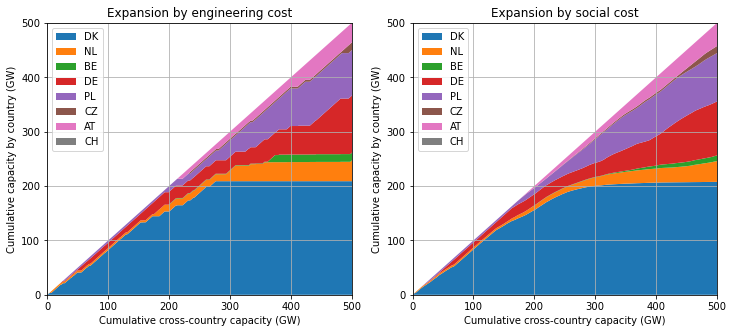

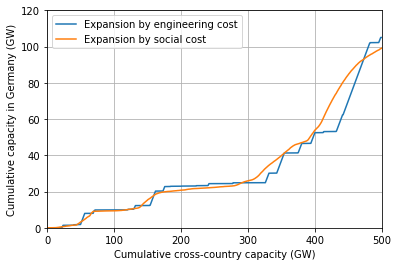

In [37]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)
#plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

# DE only
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 500)
plt.ylim(0, 120)
plt.grid()

(0.0, 20.0)

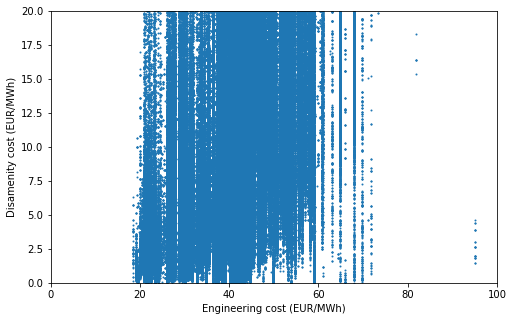

In [20]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)